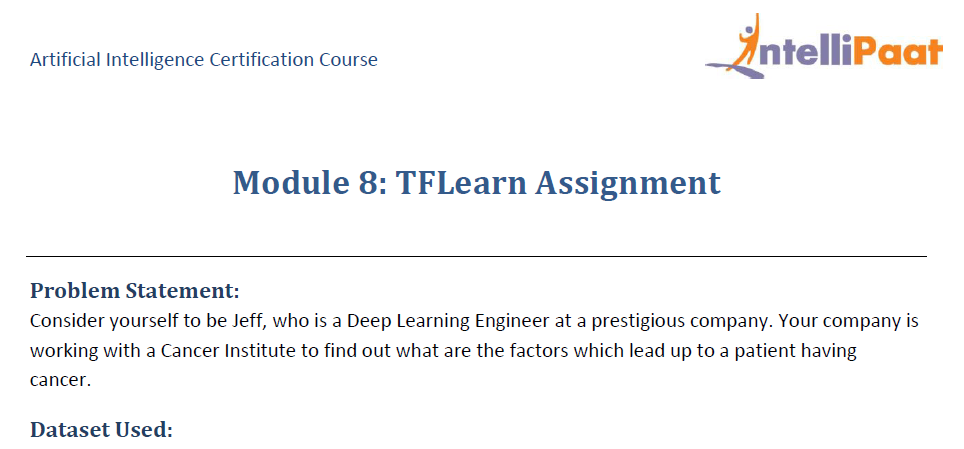
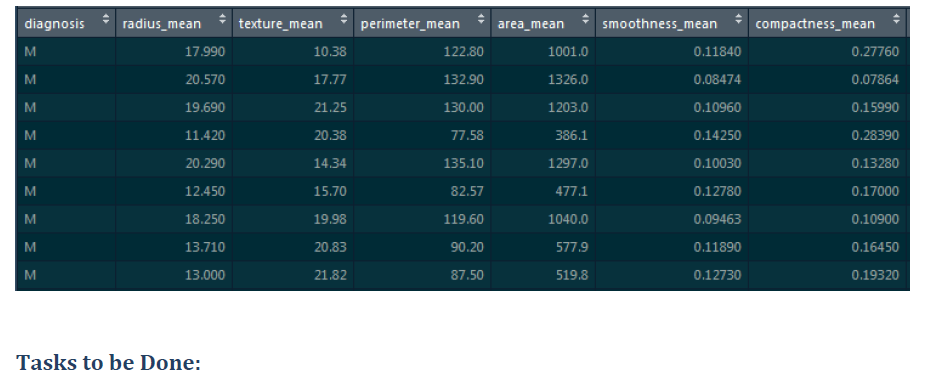
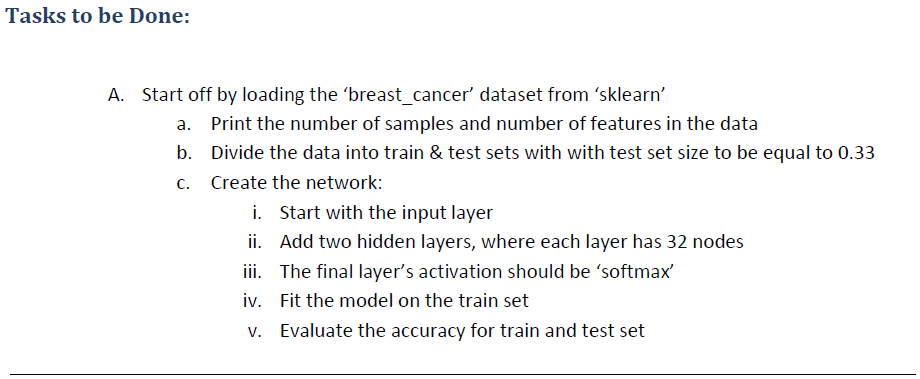

## A. Start off by loading the ‘breast_cancer’ dataset from ‘sklearn’

#### A.1. Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import tflearn
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


### A.2. Getting data ‘breast_cancer’ dataset from ‘sklearn’

In [2]:
from sklearn.datasets import load_breast_cancer
c_data = load_breast_cancer()

### A.a. Print the number of samples and number of features in the data

#### A.a.1. Below are the features in the data. 

In [3]:
samples,  features = c_data.data.shape

In [4]:
print("Total number of samples are: ",samples)

Total number of samples are:  569


In [5]:
print("Total number of features are: ",features)

Total number of features are:  30


#### A.a.2. Below are the features details.

In [6]:
list(c_data.feature_names)

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

#### A.a.3. Below are the target details.

In [7]:
list(c_data.target_names)

['malignant', 'benign']

### A.b. Divide the data into train & test sets with with test set size to be equal to 0.33

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(c_data.data, c_data.target, test_size=0.33)
N, D = X_train.shape

In [9]:
X_train.shape

(381, 30)

In [10]:
# X_train[0]

In [11]:
X_test.shape

(188, 30)

In [12]:
y_train.shape

(381,)

In [13]:
y_train[0]

1

In [14]:
y_test.shape

(188,)

### A.c. Create the network:

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from tflearn.data_utils import to_categorical
y_train = to_categorical(y_train, nb_classes=2)
y_test = to_categorical(y_test, nb_classes=2)

#### A.c.i. Start with the input layer

In [17]:
net = tflearn.input_data(shape=[None, 30])

#### A.c.ii. Add two hidden layers, where each layer has 32 nodes

In [18]:
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


#### A.c.iii. The final layer’s activation should be ‘softmax’

In [19]:
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)

#### A.c.iv. Fit the model on the train set

In [20]:
# Define model
model = tflearn.DNN(net)

In [21]:
# Start training (apply gradient descent algorithm)
model.fit(X_train, y_train, n_epoch=10, batch_size=16, show_metric=True)

Training Step: 239  | total loss: 0.07228 | time: 0.152s
| Adam | epoch: 010 | loss: 0.07228 - acc: 0.9761 -- iter: 368/381
Training Step: 240  | total loss: 0.06708 | time: 0.156s
| Adam | epoch: 010 | loss: 0.06708 - acc: 0.9784 -- iter: 381/381
--


#### A.c.v. Evaluate the accuracy for train and test set

In [22]:
# Report the training and test scores
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

In [23]:
print("Training score: {:.2f}".format(train_score[0]))
print("Test score: {:.2f}".format(test_score[0]))

Training score: 0.99
Test score: 0.94
